## EDA and Feature Engineering

Continuing from the previous notebook, we will proceed to perform EDA on the data to understand some preliminary trend and process the data in preparation for modeling in the next notebook

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

### Import the cleaned train and test datasets

In [3]:
df_train = pd.read_csv('../data/train_cleaned.csv')
df_test = pd.read_csv('../data/test_cleaned.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2047 non-null   int64  
 1   pid              2047 non-null   int64  
 2   ms_subclass      2047 non-null   int64  
 3   ms_zoning        2047 non-null   object 
 4   lot_frontage     1717 non-null   float64
 5   lot_area         2047 non-null   int64  
 6   street           2047 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2047 non-null   object 
 9   land_contour     2047 non-null   object 
 10  utilities        2047 non-null   object 
 11  lot_config       2047 non-null   object 
 12  land_slope       2047 non-null   object 
 13  neighborhood     2047 non-null   object 
 14  condition_1      2047 non-null   object 
 15  condition_2      2047 non-null   object 
 16  bldg_type        2047 non-null   object 
 17  house_style   

In [5]:
df_train.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1907
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod_add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type          0
mas_vnr_area          0
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          0
bsmtfin_type_2       55
bsmtfin_sf_2          0
bsmt_unf_sf           0
total_bsmt_sf         0
heating               0
heating_qc      

### Custom Functions and Variable Type Lists

#### Create lists of continous, nominal, ordinal and discrete variables based on the data description

In [6]:
# List of continuous variables
cont_var = ['lot_frontage', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 'garage_area', 
            'mas_vnr_area', 'lot_area', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 
            'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 
            'misc_val','saleprice', 'lot_frontage_reg_imputed']

# List of nominal variables
nom_var = ['id', 'pid','alley', 'mas_vnr_type', 'garage_type' , 'misc_feature', 'ms_subclass', 'ms_zoning', 
           'street', 'land_contour', 'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 
           'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'foundation', 'heating', 
           'central_air', 'sale_type']

# List of ordinal variables
ord_var = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'fireplace_qu', 
           'garage_finish', 'garage_qual', 'garage_cond','pool_qc', 'fence', 'lot_shape', 'utilities', 
           'land_slope', 'overall_qual', 'overall_cond', 'heating_qc', 'electrical', 'kitchen_qual', 
           'functional', 'paved_drive','exter_qual', 'exter_cond']

# List of discrete variables
disc_var = ['bsmt_full_bath', 'bsmt_half_bath', 'garage_yr_blt', 'garage_cars', 'year_built', 'year_remod_add',
            'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'mo_sold', 
            'yr_sold'] 

#### Create Function for plotting histogram of features

In [7]:
def plot_histogram(df, var_list, fig_w, fig_h, sharey=False):
    '''This function takes in a dataframe df, a list of variables, size in the form of tuple (a,b) and 
    an optional sharey field set to False by default and plot histogram for each variables'''
    sns.set_context('notebook')
    sns.set()
    list_len = len(var_list)
    n_col = 3
    n_row = math.ceil(list_len/n_col)
    fig, ax = plt.subplots(n_row, n_col, sharey=sharey)
    fig.set_size_inches(fig_w, fig_h)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.95,
                    top=0.95,
                    wspace=0.5,
                    hspace=0.5)
    
    for var, subplot in zip(var_list, ax.flatten()):
        sns.histplot(df[var], ax=subplot, kde=True)
        subplot.axvline(np.mean(df[var]), color='red', alpha =0.7)
        subplot.axvline(np.mean(df[var]), color='orange', linestyle='--', alpha =0.7)
    
    # Remove unused axes
    for a in ax.flat[list_len:]:
        a.remove()


#### Create Function for plotting boxplot of features

In [8]:
def plot_boxplot(df, var_list, fig_w, fig_h, y_var=None):
    '''This function takes in a dataframe df, a list of variables, size in the form of tuple (a,b) and 
    an optional y_var field set to None by default and plot boxplot for each variables'''
    sns.set_context('notebook')
    list_len = len(var_list)
    n_col = 3
    n_row = math.ceil(list_len/n_col)
    fig, ax = plt.subplots(n_row, n_col)
    fig.set_size_inches(fig_w, fig_h)
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.95,
                        top=0.95,
                        wspace=0.5,
                        hspace=0.5)

    if y_var==None:
        for var, subplot in zip(var_list, ax.flatten()):
            sns.boxplot(x=df[var], ax=subplot)
    
    else:
        for var, subplot in zip(var_list, ax.flatten()):
            sns.boxplot(x=var, y=y_var, data=df, ax=subplot)
    
    # Remove unused axes
    for a in ax.flat[list_len:]:
        a.remove()
        


#### Create Function for plotting scatterplot of features

In [9]:
def plot_scatterplot(df, var_list, fig_w, fig_h, y_var):
    '''This function takes in a dataframe df, a list of variables, integer for fig width and fig height 
    and a continuous variable y_var and plot scatterplot for each variables'''
    sns.set_context('notebook')
    list_len = len(var_list)
    n_col = 3
    n_row = math.ceil(list_len/n_col)
    fig, ax = plt.subplots(n_row, n_col)
    fig.set_size_inches(fig_w, fig_h)
    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.95,
                        top=0.95,
                        wspace=0.5,
                        hspace=0.5)
    
    for var, subplot in zip(var_list, ax.flatten()):
        sns.scatterplot(x=var, y=y_var, data=df, ax=subplot)
    
    # Remove unused axes
    for a in ax.flat[list_len:]:
        a.remove()
        



#### Create Function for encoding ordinal variables

In [10]:
def ord_encoder(df_train, df_test, category, var_list):
    '''This function takes in two dataframes df_train and df_test, a list category containing the 
    list of categories for the ordinal variable and a variable type list var_list and creates ordinal
    rank values for each ordinal variable in both the df_train and df_test dataframes'''    
    for var in var_list:
        oe = OrdinalEncoder(categories=[category])
        df_train[var]= oe.fit_transform(df_train[[var]])
        df_test[var]=oe.transform(df_test[[var]])


#### Create Function for showing variables with null values and sum of null values in a DataFrame and for a variable type 

In [11]:
def var_null_count(df, var_list=None):
    '''This function takes in a dataframe df and an optional variable type list var_list 
    and returns a series null_count containing only variables in the dataframe that has 
    null values and the number of null values'''
    
    null = df.isna().sum()
    if var_list is None:
        null_count = null[null!=0]       
    else:
        null_count=null[(null!=0)&(null.index.isin(var_list))]
                                                            
    return null_count 

#### Create Function for reducing cardinality of nominal variables

In [12]:
def reduce_cardinality(df_train, df_test, var_list, threshold):
    '''This function takes in two dataframes df_train and df_test, a variable type list var_list and 
    an float between between 0 and 1. For each nominal variable, if the category falls outside of the threshold
    they would be renamed as 'Others' so that smaller categories are grouped together. Variables with only
    one category left will be dropped. The function then returns the processed df_train and df_test'''     
    for var in var_list:
        var_cumsum = df_train[var].value_counts(normalize=True).cumsum()
        var_filter = var_cumsum[var_cumsum>threshold]
        for val in var_filter.index:
            df_train[var].replace(val, 'Others', inplace=True)
            df_test[var].replace(val, 'Others', inplace=True)
        if len(df_train[var].unique())==1:
            df_train.drop(columns=[var], inplace=True)
            df_test.drop(columns=[var], inplace=True)   
    return df_train, df_test

#### Create Function for one hot encoding nominal variables

In [13]:
def onehotenc(df, var_list):
    '''This function takes in a dataframe df and a variable type list var_list 
    and creates a one hot encoded dataframe frame_encoded. This will be merged with the original 
    dataframe df and the original variable column will be dropped'''    
    for var in var_list:
        ohe = OneHotEncoder()
        encoded = ohe.fit_transform(df[[var]])
        column_name = ohe.get_feature_names([var])
        frame_encoded = pd.DataFrame(encoded.todense(), columns=column_name)
        df = pd.merge(df, frame_encoded, left_index=True, right_index=True)
        df.drop(columns=[var], inplace=True)
        
    return df

### Review null values in lot_frontage

There are 330 null values in `lot_frontage` 

In [14]:
var_null_count(df_train, cont_var)

lot_frontage    330
dtype: int64

#### Fix the null values in lot_frontage

Due to the significant number of missing values, imputing with mean `lot_frontage` would distort its true distribution. A good way to impute values would be to use Linear Regression. In general, a house with a big area would have a a longer frontage. Therefore, there could be some correlation between the square of `lot_frontage` and `lot_area`

In [15]:
# Create a new training set with rows with missing lot_frontage dropped
df_train_new = df_train.dropna(subset=['lot_frontage'])


df_train_new['lot_frontage_sq']= df_train_new['lot_frontage'].map(lambda x: x**2)

X_col = df_train_new[['lot_area']]
impute_column = df_train_new['lot_frontage_sq']

#Instantiate and train the Linear Regression 
model = LinearRegression()
model.fit(X_col, impute_column)

<ipython-input-15-83495631c868>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_new['lot_frontage_sq']= df_train_new['lot_frontage'].map(lambda x: x**2)


LinearRegression()

In [16]:
#Identify indices of rows with missing values on lot_frontage in train set
missing_idx_train = df_train.index[df_train['lot_frontage'].isnull()]

In [17]:
#Identify indices of rows with missing values on lot_frontage in test set
missing_idx_test = df_test.index[df_test['lot_frontage'].isnull()]

In [18]:
#Impute the missing values with the square root of the missing values 
#predicted by the trained Linear Regression in the training set
df_train['lot_frontage_reg_imputed'] = [df_train.loc[i,'lot_frontage'] if i not in missing_idx_train
     else np.sqrt(model.predict(pd.DataFrame(df_train.loc[i,['lot_area']]).T)[0])
     for i in range(df_train.shape[0])]

In [19]:
#Impute the missing values with the square root of the missing values 
#predicted by the trained Linear Regression based on the train set
#in the test set
df_test['lot_frontage_reg_imputed'] = [df_test.loc[i,'lot_frontage'] if i not in missing_idx_test
     else np.sqrt(model.predict(pd.DataFrame(df_test.loc[i,['lot_area']]).T)[0])
     for i in range(df_test.shape[0])]

After imputing the distribution of `lot_frontage` did not change very much, with the exception that there were a few more outliers. This will be handled at a later stage.

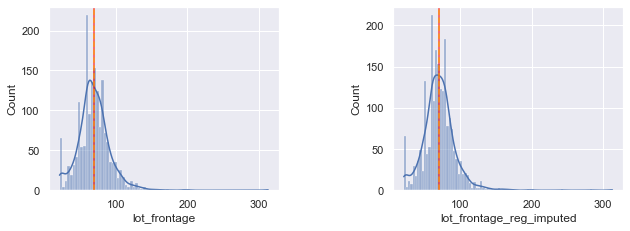

In [20]:
plot_histogram(df_train, 
               ['lot_frontage', 'lot_frontage_reg_imputed'], 
               15, 3,
               sharey=False)

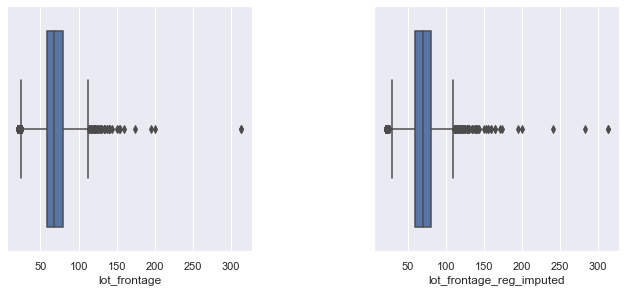

In [21]:
plot_boxplot(df_train, 
             ['lot_frontage', 'lot_frontage_reg_imputed'],
             16, 
             4
)

In [22]:
# Drop the original lot_frontage column on both train and test set
#df_train.drop(columns=['lot_frontage'], inplace=True)
#df_test.drop(columns=['lot_frontage'], inplace=True)

### Explore Discrete Variables

In [23]:
#Show all the unique values of discrete variables
unique_val = {col: df_train[col].unique() for col in disc_var}
unique_val

{'bsmt_full_bath': array([0., 1., 2., 3.]),
 'bsmt_half_bath': array([0., 1., 2.]),
 'garage_yr_blt': array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
        1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
        1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
        1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
        1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
        1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
        1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
        1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
        1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
        1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
        1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
        1895., 1919.]),
 'garage_cars': array([2., 1., 3., 0., 4., 5.]),
 'year_built': array([1976, 1996, 1953, 2006,

**Key Observation:**

1. It may be interesting to explore the age of the house at the point of sale and the number of years since remod with salesprice

2. `bsmt_full_bath`, `bsmt_half_bath`, `garage_cars`, `full_bath`, `half_bath`, `bedroom_abvgr`, `kitchen_abvgr`, `totrms_abvgrd`, `fireplaces`, `garage_yr_blt`,`year_built` and `year_remod_add` should be considered as continuous variables as they all indicate number of each features which may have a linear relationship with the target variable `saleprice`

3. `mo_sold` and `year_sold` would be considered as nominal features

In [24]:
# Create two new continuous variables 'age' and 'yr_since_remod'

df_train['age'] = df_train['yr_sold'] - df_train['year_built']
df_test['age'] = df_test['yr_sold'] - df_test['year_built']

df_train['yr_since_remod'] = df_train['yr_sold'] - df_train['year_remod_add']
df_test['yr_since_remod'] = df_test['yr_sold'] - df_test['year_remod_add']

In [25]:
# Reassign some discrete variables as continuous variables

cont_var += ['bsmt_full_bath', 'bsmt_half_bath', 'garage_cars', 'full_bath', 
             'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 
             'fireplaces', 'age', 'yr_since_remod', 'garage_yr_blt', 'year_built', 'year_remod_add']

In [26]:
# Reassign some discrete variables as nominal variables

nom_var += ['mo_sold', 'yr_sold']

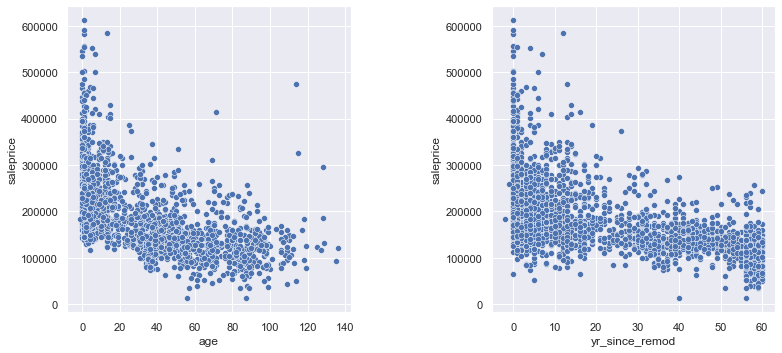

In [27]:
plot_scatterplot(df_train, ['age', 'yr_since_remod'], 18.5, 5, 'saleprice')

There seems to be a negative correlation of `saleprice` with `age` and `yr_since_remod`

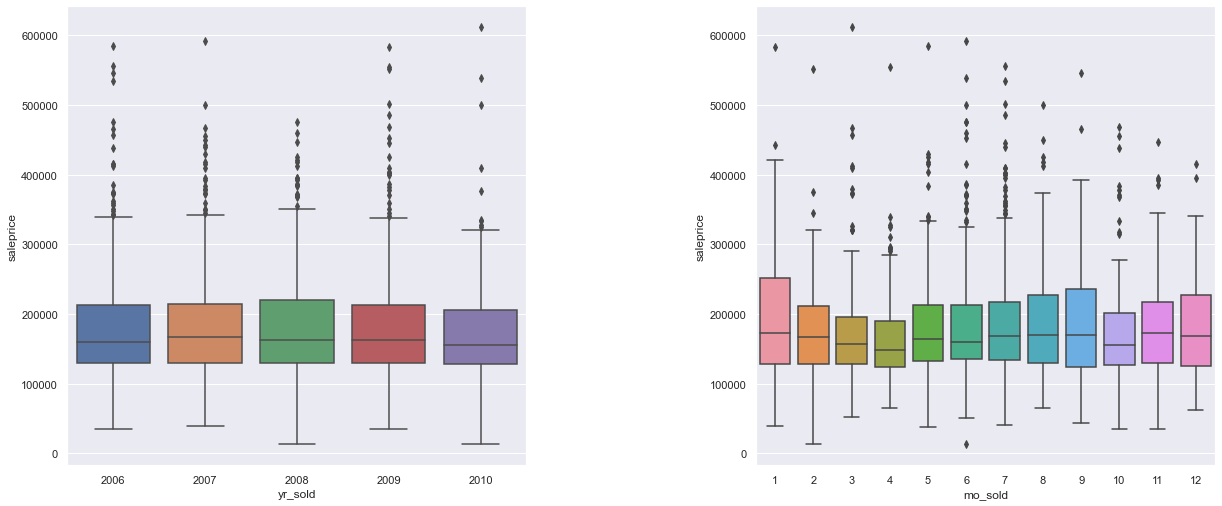

In [28]:
plot_boxplot(df_train, ['yr_sold','mo_sold'], 30, 7.5, y_var='saleprice')

The distribution of `saleprice` by `yr_sold` and `mo_sold` do not seem to differ much through the years and months. We will proceed to remove these two features as they are not key predictors of `saleprice`

In [29]:
df_train.drop(columns=['yr_sold', 'mo_sold'], inplace=True)
df_test.drop(columns=['yr_sold', 'mo_sold'], inplace=True)

# Update nominal variable list
nom_var.remove('yr_sold')
nom_var.remove('mo_sold')

Due to complexities related to considering `garage_yr_blt` as a continuous variable with 114 null values, we will drop this feature

In [30]:
df_train.drop(columns=['garage_yr_blt'], inplace=True)
df_test.drop(columns=['garage_yr_blt'], inplace=True)

# Update nominal variable list
cont_var.remove('garage_yr_blt')

### Review Outliers

We will plot the histogram of all continuous variables

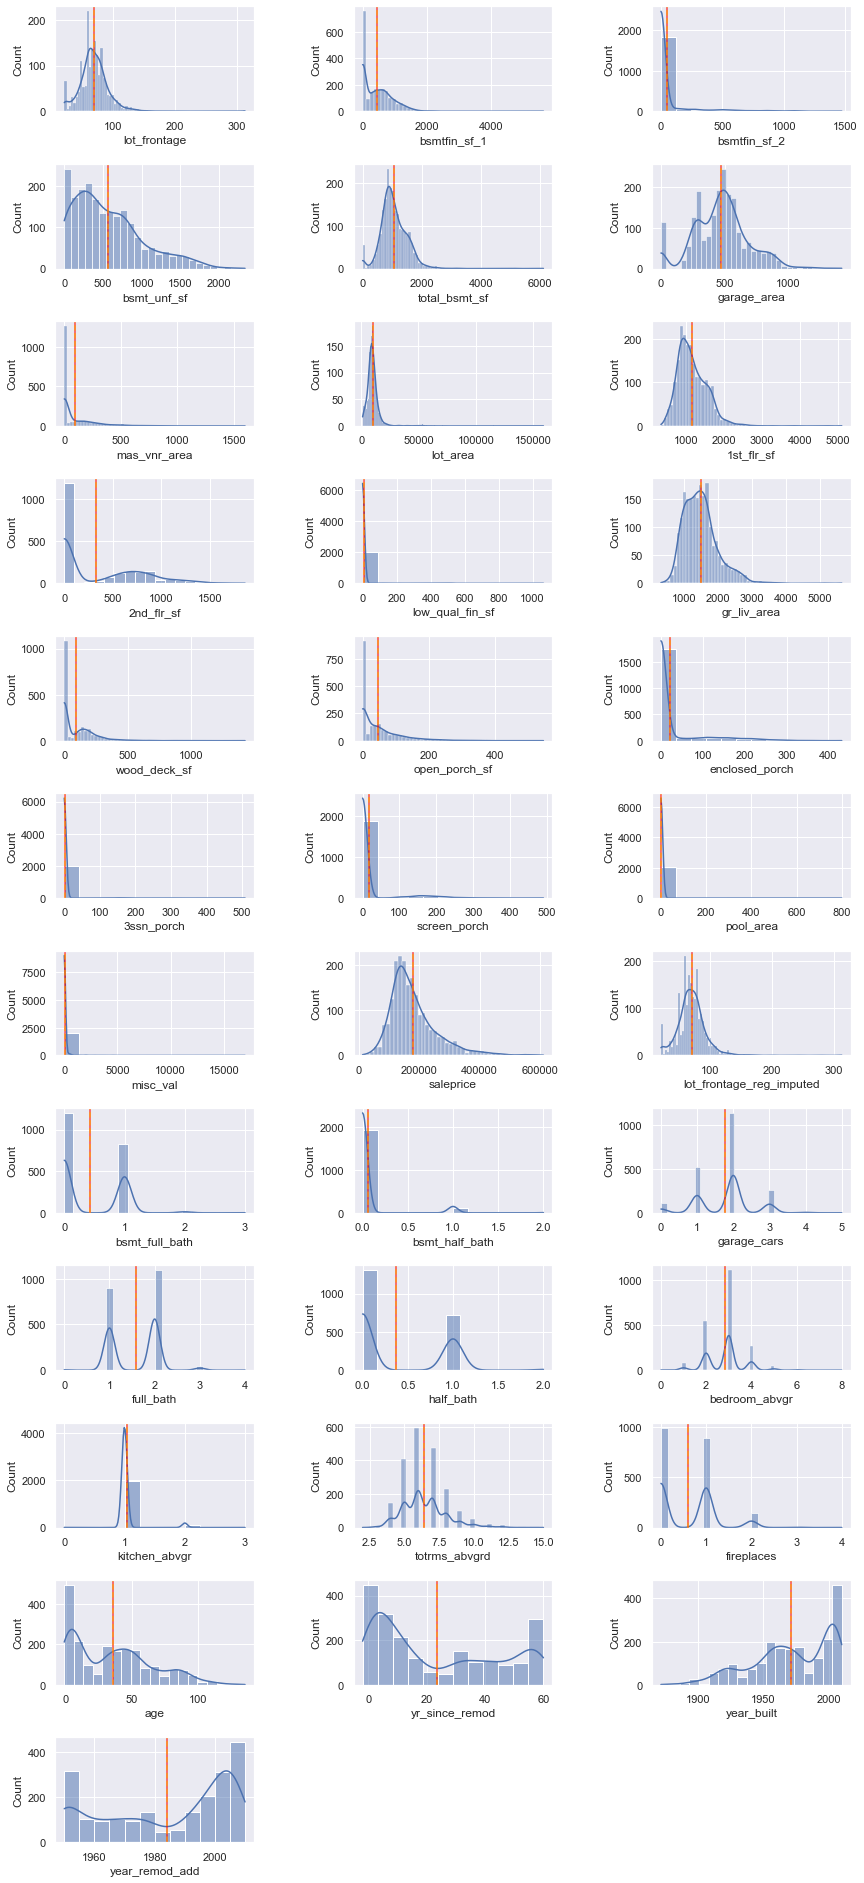

In [31]:
plot_histogram(df_train, cont_var, 13, 30)

**Key Observation**

Most of the continuous variables exhibit a right skew. We will seek to confirm this with a boxplot of all the continuous variables

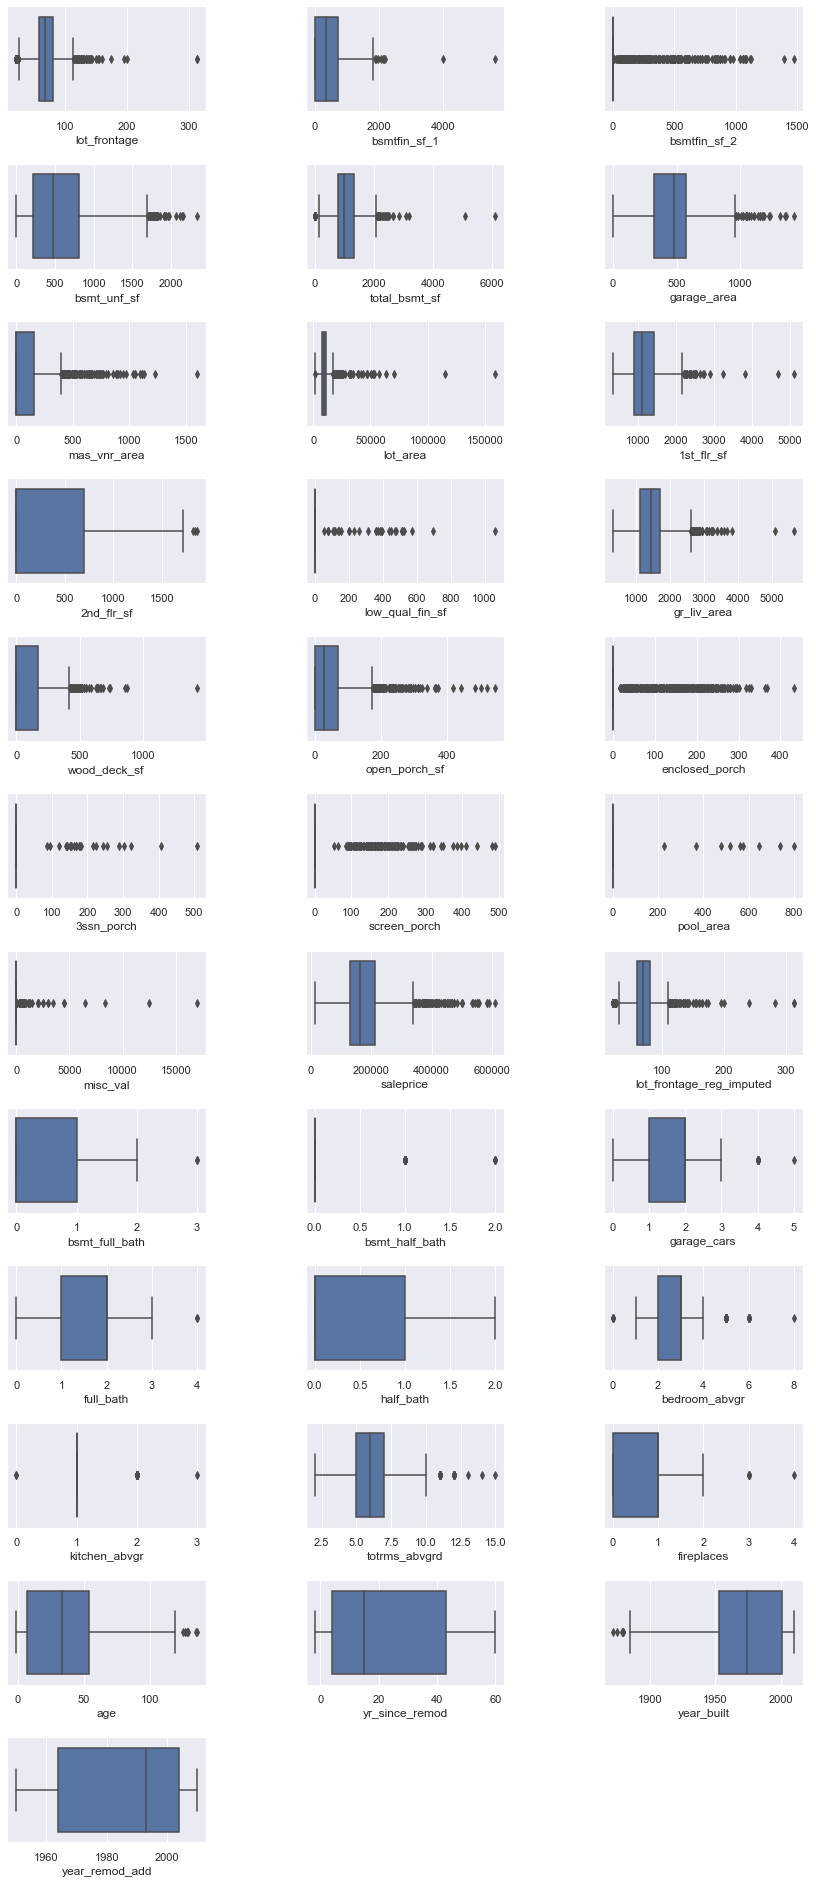

In [32]:
plot_boxplot(df_train, cont_var, 13, 30)

Next we will attempt to visualize the how the continuous variable vary with the target variable `saleprice`

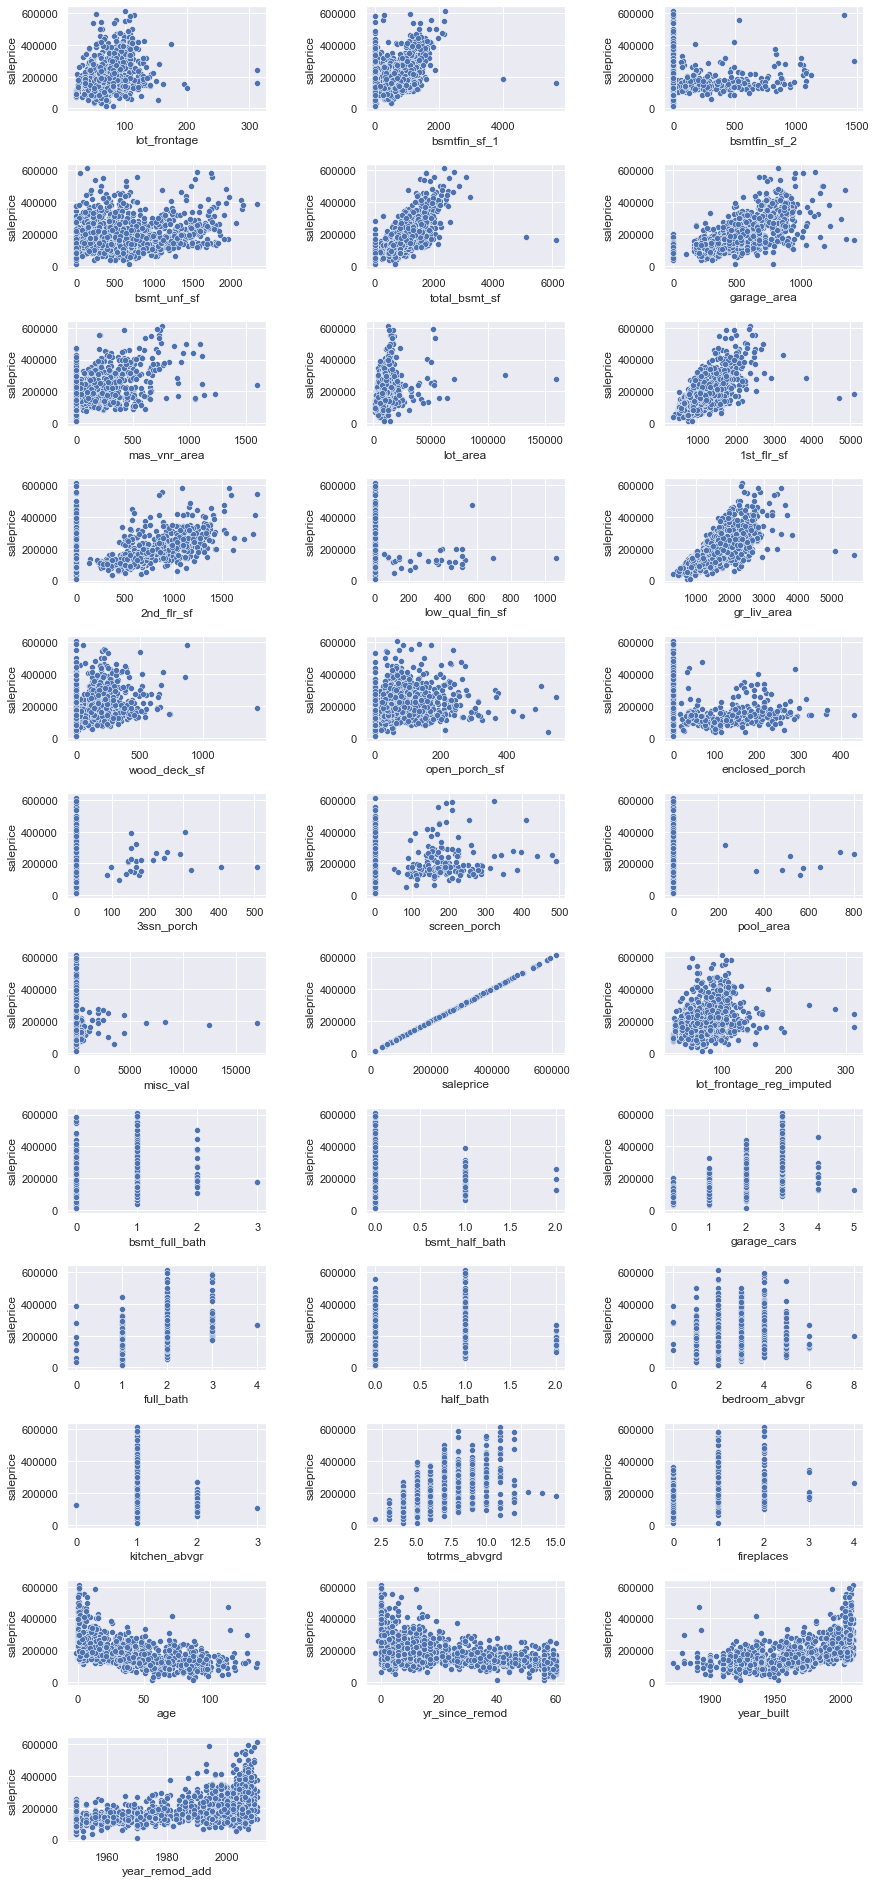

In [33]:
plot_scatterplot(df_train, cont_var, 13, 30, 'saleprice')

**Key Observation**
1. `bsmtfin_sf_1`, `bsmtfin_sf_2`, `total_bsmt_sf`,`lot_area`, `1st_flr_sf` and `gr_liv_area` all have a couple of outliers towards the right extreme end of house sizes. We will will remove two properties from each of these features

2. The `lot_frontage_reg_imputed` scatterplot also revealed 4 outliers towards the right extreme end of house sizes. We will also remove them

3. The scatterplot also made it obvious why some continuous variables were so skewed to the right: there were many data points with zero values

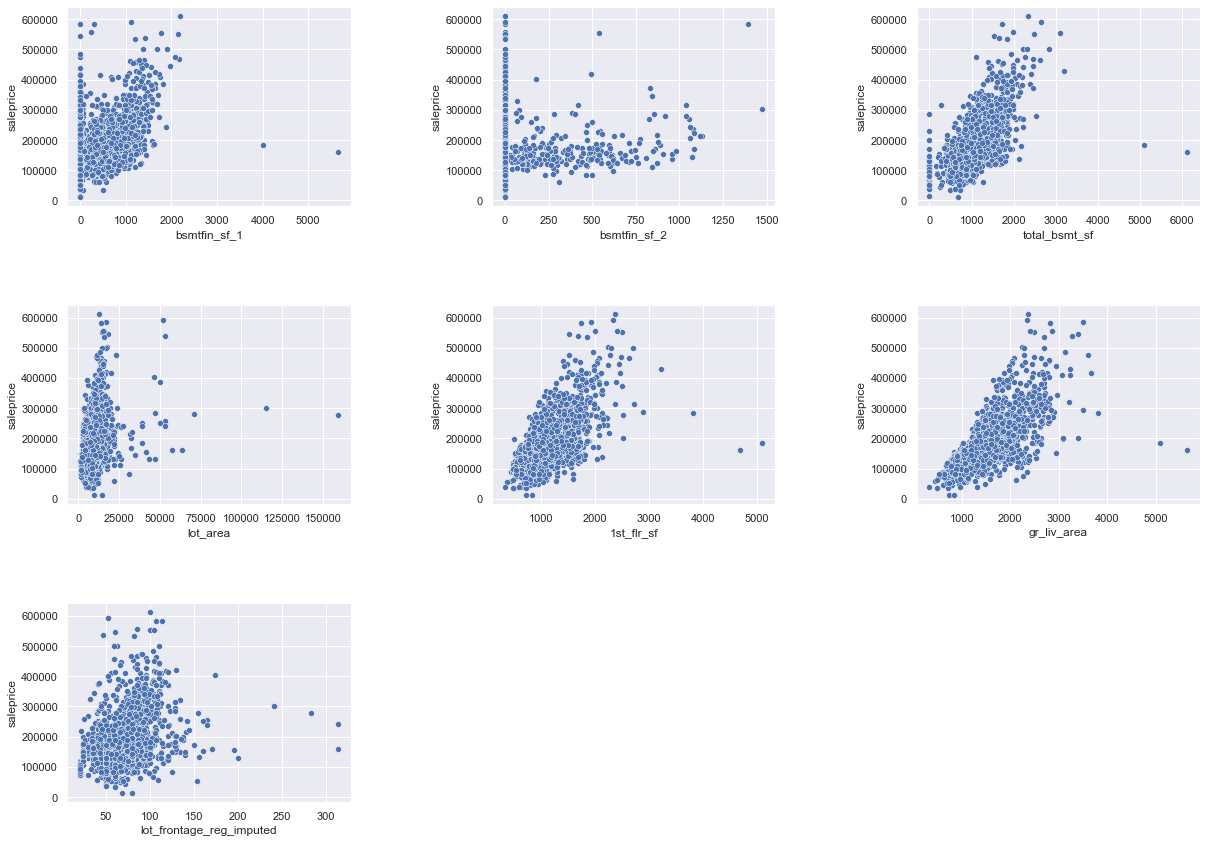

In [34]:
outlier_con_var = ['bsmtfin_sf_1', 
                   'bsmtfin_sf_2', 
                   'total_bsmt_sf',
                   'lot_area', 
                   '1st_flr_sf', 
                   'gr_liv_area',
                   'lot_frontage_reg_imputed']

plot_scatterplot(df_train, outlier_con_var, 18.5, 13, 'saleprice')

In [35]:
# Properties with lot_area greater than 100000
df_train.loc[df_train['lot_area']>100000, :]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,sale_type,saleprice,lot_frontage_reg_imputed,age,yr_since_remod
471,2116,906426060,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697.0,Unf,0.0,747.0,1444.0,GasA,Gd,Y,SBrkr,1444,700,0,2144,0.0,1.0,2,0,4,1,Gd,7,Typ,2,TA,Attchd,Fin,2.0,389.0,TA,TA,Y,0,98,0,0,0,0,NaN,NaN,Shed,500,WD,277000,282.809152,49,1
693,2072,905301050,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219.0,Unf,0.0,424.0,1643.0,GasA,TA,Y,SBrkr,1824,0,0,1824,1.0,0.0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,Unf,2.0,739.0,TA,TA,Y,380,48,0,0,0,0,NaN,NaN,NaN,0,WD,302000,240.956926,36,5


In [36]:
df_train.drop(axis=0, index=[471, 693], inplace=True)

In [37]:
# Properties with bsmtfin_sf_1 greater than 3000
df_train.loc[df_train['bsmtfin_sf_1']>3000, :]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,sale_type,saleprice,lot_frontage_reg_imputed,age,yr_since_remod
959,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,New,160000,313.0,0,0
1881,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,New,183850,128.0,-1,-2


In [38]:
df_train.drop(axis=0, index=[959, 1881], inplace=True)

In [39]:
# Properties with 1st_flr_sf greater than 4000
df_train.loc[df_train['1st_flr_sf']>4000, :]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,sale_type,saleprice,lot_frontage_reg_imputed,age,yr_since_remod


In [40]:
# Properties with bsmtfin_sf_2 greater than 1200
df_train.loc[df_train['bsmtfin_sf_2']>1200, :]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,sale_type,saleprice,lot_frontage_reg_imputed,age,yr_since_remod
769,2093,906201200,60,RL,86.0,10380,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1986,1987,Gable,CompShg,Plywood,Plywood,BrkFace,172.0,Gd,TA,CBlock,TA,TA,Gd,LwQ,28.0,ALQ,1474.0,0.0,1502.0,GasA,Ex,Y,SBrkr,1553,1177,0,2730,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,Fin,2.0,576.0,TA,TA,Y,201,96,0,0,0,0,NaN,MnPrv,NaN,0,WD,301000,86.0,21,20
1688,2451,528360050,60,RL,114.0,17242,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,9,5,1993,1994,Hip,CompShg,MetalSd,MetalSd,BrkFace,738.0,Gd,Gd,PConc,Ex,TA,Gd,Rec,292.0,GLQ,1393.0,48.0,1733.0,GasA,Ex,Y,SBrkr,1933,1567,0,3500,1.0,0.0,3,1,4,1,Ex,11,Typ,1,TA,Attchd,RFn,3.0,959.0,TA,TA,Y,870,86,0,0,210,0,NaN,NaN,NaN,0,WD,584500,114.0,13,12


In [41]:
df_train.drop(axis=0, index=[769, 1688], inplace=True)

In [42]:
# Properties with total_bsmt_sf greater than 5000
df_train.loc[df_train['total_bsmt_sf']>5000, :]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,sale_type,saleprice,lot_frontage_reg_imputed,age,yr_since_remod


In [43]:
# Properties with gr_liv_area greater than 5000
df_train.loc[df_train['gr_liv_area']>5000, :]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,sale_type,saleprice,lot_frontage_reg_imputed,age,yr_since_remod


In [44]:
# Properties with lot_frontage_reg_imputed_area greater than 5000
df_train.loc[df_train['lot_frontage_reg_imputed']>220, :]


,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,sale_type,saleprice,lot_frontage_reg_imputed,age,yr_since_remod
1331,1266,535427070,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425.0,Unf,0.0,160.0,585.0,GasA,Ex,Y,SBrkr,2069,0,0,2069,1.0,0.0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,RFn,2.0,505.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,WD,242000,313.0,48,1


In [45]:
df_train.drop(axis=0, index=[1331], inplace=True)

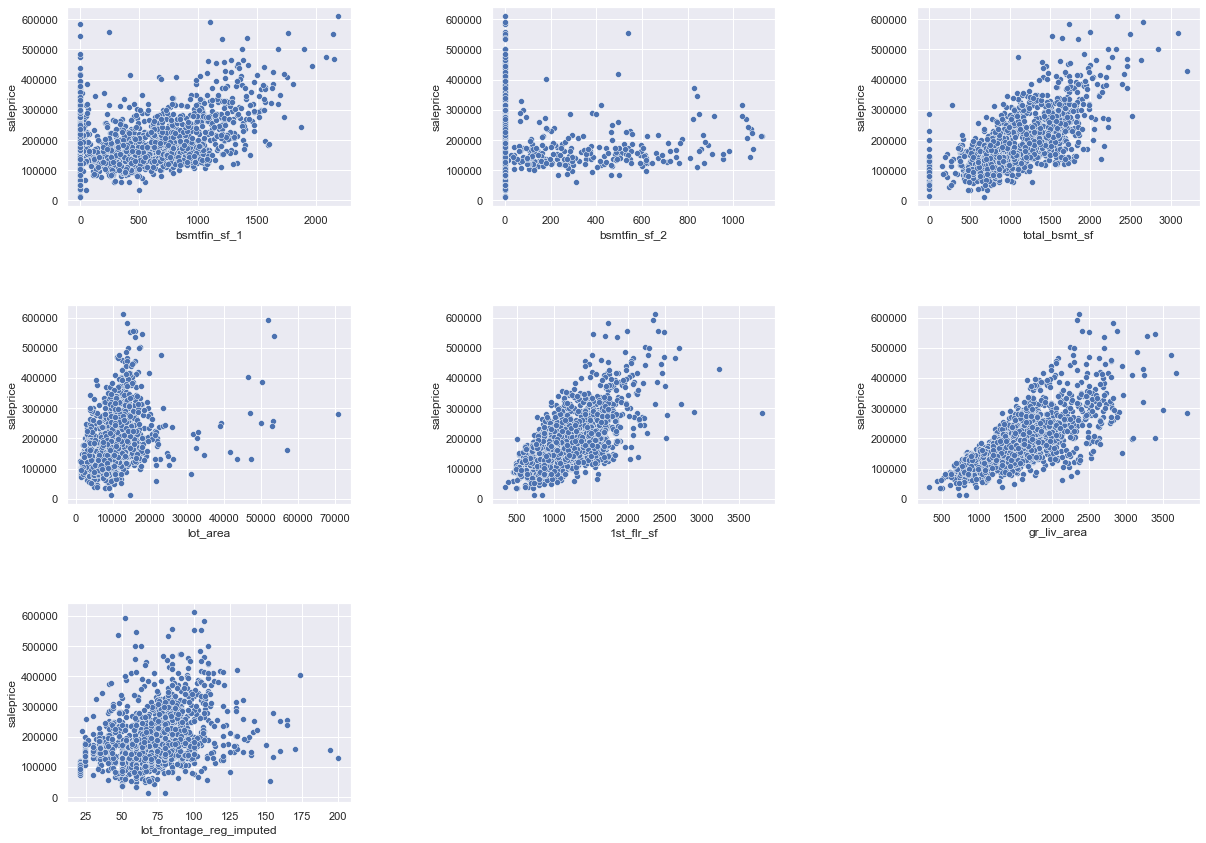

In [46]:
# Plot the scatterplot again for the 7 variables with outliers
plot_scatterplot(df_train, outlier_con_var, 18.5, 13, 'saleprice')

### Encode Ordinal Variables 

We need to process all remaining features with null values and replace them with NA to facilitate ordinal and one hot encoding

In [47]:
#Create a list of features with null values
var_nul_train = list(df_train.isnull().sum()[df_train.isnull().sum()!=0].index)

var_nul_train

['lot_frontage',
 'alley',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'fireplace_qu',
 'garage_type',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'pool_qc',
 'fence',
 'misc_feature']

In [48]:
var_nul_test = list(df_test.isnull().sum()[df_test.isnull().sum()!=0].index)

var_nul_test

['lot_frontage',
 'alley',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'fireplace_qu',
 'garage_type',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'pool_qc',
 'fence',
 'misc_feature']

In [49]:
# Exclude 'lot_frontage' as it has been imputed as 'lot_frontage_reg_imputed'
var_nul_train.remove('lot_frontage')

# Replace null values with NA
for var in var_nul_train:
    df_train[var].fillna('NA', inplace=True)
    df_test[var].fillna('NA', inplace=True)

Show list of ordinal variables

In [50]:
# Show all ordinal variables
ord_var

['bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'fireplace_qu',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'pool_qc',
 'fence',
 'lot_shape',
 'utilities',
 'land_slope',
 'overall_qual',
 'overall_cond',
 'heating_qc',
 'electrical',
 'kitchen_qual',
 'functional',
 'paved_drive',
 'exter_qual',
 'exter_cond']

In [51]:
# Encode land_slope
land_slope_cat = ['Sev', 'Mod', 'Gtl']
var_list = ['land_slope']

ord_encoder(df_train, df_test, land_slope_cat, var_list)
df_train['land_slope'].unique()

array([2., 0., 1.])

In [52]:
# Encoding garage_finish
garage_finish_cat = ['NA', 'Unf', 'RFn', 'Fin']
var_list = ['garage_finish']
ord_encoder(df_train, df_test, garage_finish_cat, var_list)
df_train['garage_finish'].unique()

array([2., 1., 3., 0.])

In [53]:
# Encoding pool_qc
pool_qc_cat = ['NA', 'Fa', 'TA', 'Gd', 'Ex']
var_list = ['pool_qc']

ord_encoder(df_train, df_test, pool_qc_cat, var_list)
df_train['pool_qc'].unique()

array([0., 1., 3., 4., 2.])

In [54]:
# Encoding fence
fence_cat = ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']
var_list = ['fence']

ord_encoder(df_train, df_test, fence_cat, var_list)
df_train['fence'].unique()

array([0., 3., 4., 2., 1.])

In [55]:
# Encoding bsmt_qual, bsmt_cond, fireplace_qu, garage_qual, garage_cond

var_list = ['bsmt_qual', 'bsmt_cond', 'fireplace_qu', 'garage_qual', 'garage_cond']

    
var_cat = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']


ord_encoder(df_train, df_test, var_cat, var_list)
df_train['bsmt_qual'].unique()

array([3., 4., 2., 0., 5., 1.])

In [56]:
# Encoding bsmt_exposure

bsmt_exposure_cat = ['NA', 'No', 'Mn', 'Av', 'Gd']
var_list = ['bsmt_exposure']

ord_encoder(df_train, df_test, bsmt_exposure_cat, var_list)
df_train['bsmt_exposure'].unique()

array([1., 4., 3., 0., 2.])

In [57]:
# Encoding bsmtfin_type_1, bsmtfin_type_2

var_list = ['bsmtfin_type_1', 'bsmtfin_type_2']

    
var_cat = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']


ord_encoder(df_train, df_test, var_cat, var_list)
df_train['bsmtfin_type_1'].unique()

array([6., 1., 5., 3., 0., 4., 2.])

In [58]:
# Encoding lot_shape

lot_shape_cat = ['IR3', 'IR2', 'IR1', 'Reg']
var_list = ['lot_shape']

ord_encoder(df_train, df_test, lot_shape_cat, var_list)
df_train['lot_shape'].unique()

array([2., 3., 1., 0.])

In [59]:
# Encoding utilities

utilities_cat = ['ELO', 'NoSeWa', 'NoSewr', 'AllPub']
var_list = ['utilities']

ord_encoder(df_train, df_test, utilities_cat, var_list)
df_train['utilities'].unique()

array([3., 1., 2.])

In [60]:
# Encoding overall_qual, overall_cond

var_list = ['overall_qual', 'overall_cond']

    
var_cat = [1,2,3,4,5,6,7,8,9,10]


ord_encoder(df_train, df_test, var_cat, var_list)
df_train['overall_qual'].unique()

array([5., 6., 4., 7., 9., 3., 8., 2., 1., 0.])

In [61]:
# Encoding heating_qc, kitchen_qual, exter_qual, exter_cond

var_list = ['heating_qc', 'kitchen_qual', 'exter_qual', 'exter_cond']

var_cat = ['Po','Fa', 'TA', 'Gd', 'Ex']


ord_encoder(df_train, df_test, var_cat, var_list)
df_train['heating_qc'].unique()

array([4., 2., 3., 1., 0.])

In [62]:
# Encoding electrical

electrical_cat = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']
var_list = ['electrical']

ord_encoder(df_train, df_test, electrical_cat, var_list)
df_train['electrical'].unique()

array([4., 2., 3., 1., 0.])

In [63]:
# Encoding functional

functional_cat = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
var_list = ['functional']

ord_encoder(df_train, df_test, functional_cat, var_list)
df_train['functional'].unique()

array([7., 4., 5., 3., 6., 1., 0., 2.])

In [64]:
# Encoding paved_drive

paved_drive_cat = ['N', 'P', 'Y']
var_list = ['paved_drive']

ord_encoder(df_train, df_test, paved_drive_cat, var_list)
df_train['paved_drive'].unique()

array([2., 0., 1.])

In [65]:
# Display unique values of all ordinal features

{var: df_train[var].unique() for var in ord_var}

{'bsmt_qual': array([3., 4., 2., 0., 5., 1.]),
 'bsmt_cond': array([3., 4., 0., 2., 1., 5.]),
 'bsmt_exposure': array([1., 4., 3., 0., 2.]),
 'bsmtfin_type_1': array([6., 1., 5., 3., 0., 4., 2.]),
 'bsmtfin_type_2': array([1., 3., 0., 4., 6., 2., 5.]),
 'fireplace_qu': array([0., 3., 4., 1., 5., 2.]),
 'garage_finish': array([2., 1., 3., 0.]),
 'garage_qual': array([3., 2., 0., 4., 5., 1.]),
 'garage_cond': array([3., 2., 0., 1., 4., 5.]),
 'pool_qc': array([0., 1., 3., 4., 2.]),
 'fence': array([0., 3., 4., 2., 1.]),
 'lot_shape': array([2., 3., 1., 0.]),
 'utilities': array([3., 1., 2.]),
 'land_slope': array([2., 0., 1.]),
 'overall_qual': array([5., 6., 4., 7., 9., 3., 8., 2., 1., 0.]),
 'overall_cond': array([7., 4., 6., 5., 2., 8., 1., 3., 0.]),
 'heating_qc': array([4., 2., 3., 1., 0.]),
 'electrical': array([4., 2., 3., 1., 0.]),
 'kitchen_qual': array([3., 2., 1., 4.]),
 'functional': array([7., 4., 5., 3., 6., 1., 0., 2.]),
 'paved_drive': array([2., 0., 1.]),
 'exter_qual': 

### Features Selection

We now want to select features which may help to train a well-forming model

#### Review manually features to be excluded

1. `sale_type` is a consequence of the transaction and not a predictor of `sale_price`. Therefore we will remove it. 

In [66]:
df_train.drop(columns=['sale_type'], inplace=True)
df_test.drop(columns=['sale_type'], inplace=True)

In [67]:
#Update nom_var list

nom_var.remove('sale_type')

#### Use heatmap to identify multicolinearity and remove features with low correlation to the target variable

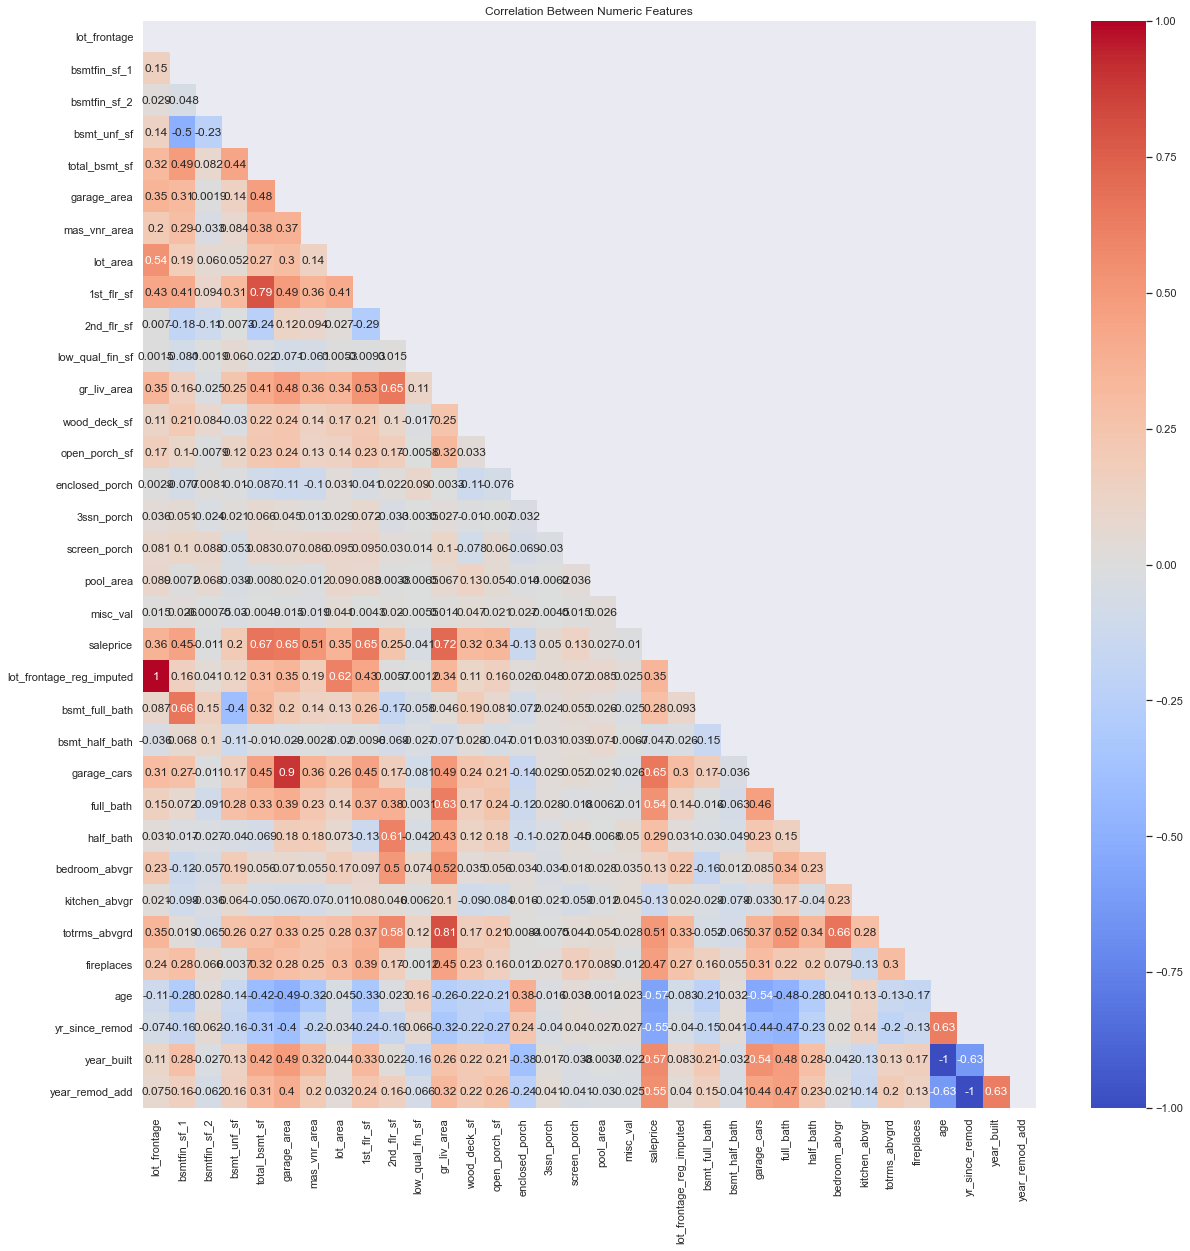

In [68]:
# Create a heatmap to visualize the correlation between all continuous features

corr_cont = df_train[cont_var].corr()
plt.figure(figsize=(20,20))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr_cont)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
sns.heatmap(corr_cont, mask=mask, annot=True, vmin=-1, vmax=1, center= 0, cmap='coolwarm')
plt.title('Correlation Between Numeric Features');

**Key Observation**

1. `total_bsmt_sf`, `garage_area`, `1st_flr_sf` and `gr_liv_area` exhibit the greatest positive correlation with the target variable `saleprice`. Intuitively, these features have to do with size of a property which is a known predictor of sales price. These features should be chosen as possible candidates for training the model.

2. `bsmt_unf_sf` is the most negatively correlated feature with `saleprice`. Again it is logical to say that an undesirable feature such as unfinished basement may affect sales price negatively.

3. We will drop columns with little correlation with the `saleprice` based on the following criteria:
  * Positive correlation less than 0.3
  * Negative correlation more than -0.15

In [69]:
cont_var_drop = corr_cont.loc[(corr_cont['saleprice']<0.3)&(corr_cont['saleprice']> -0.15), ['saleprice']]
cont_var_drop

,saleprice
bsmtfin_sf_2,-0.011457
bsmt_unf_sf,0.195770
2nd_flr_sf,0.245790
low_qual_fin_sf,-0.041252
enclosed_porch,-0.134406
3ssn_porch,0.049981
screen_porch,0.129257
pool_area,0.026511
misc_val,-0.010392
bsmt_full_bath,0.281843


In [70]:
# Drop the features on both train and test set
df_train.drop(columns=cont_var_drop.index, inplace=True)
df_test.drop(columns=cont_var_drop.index, inplace=True)

In [71]:
# Remove the features on cont_var

for var in cont_var_drop.index:
    cont_var.remove(var) 

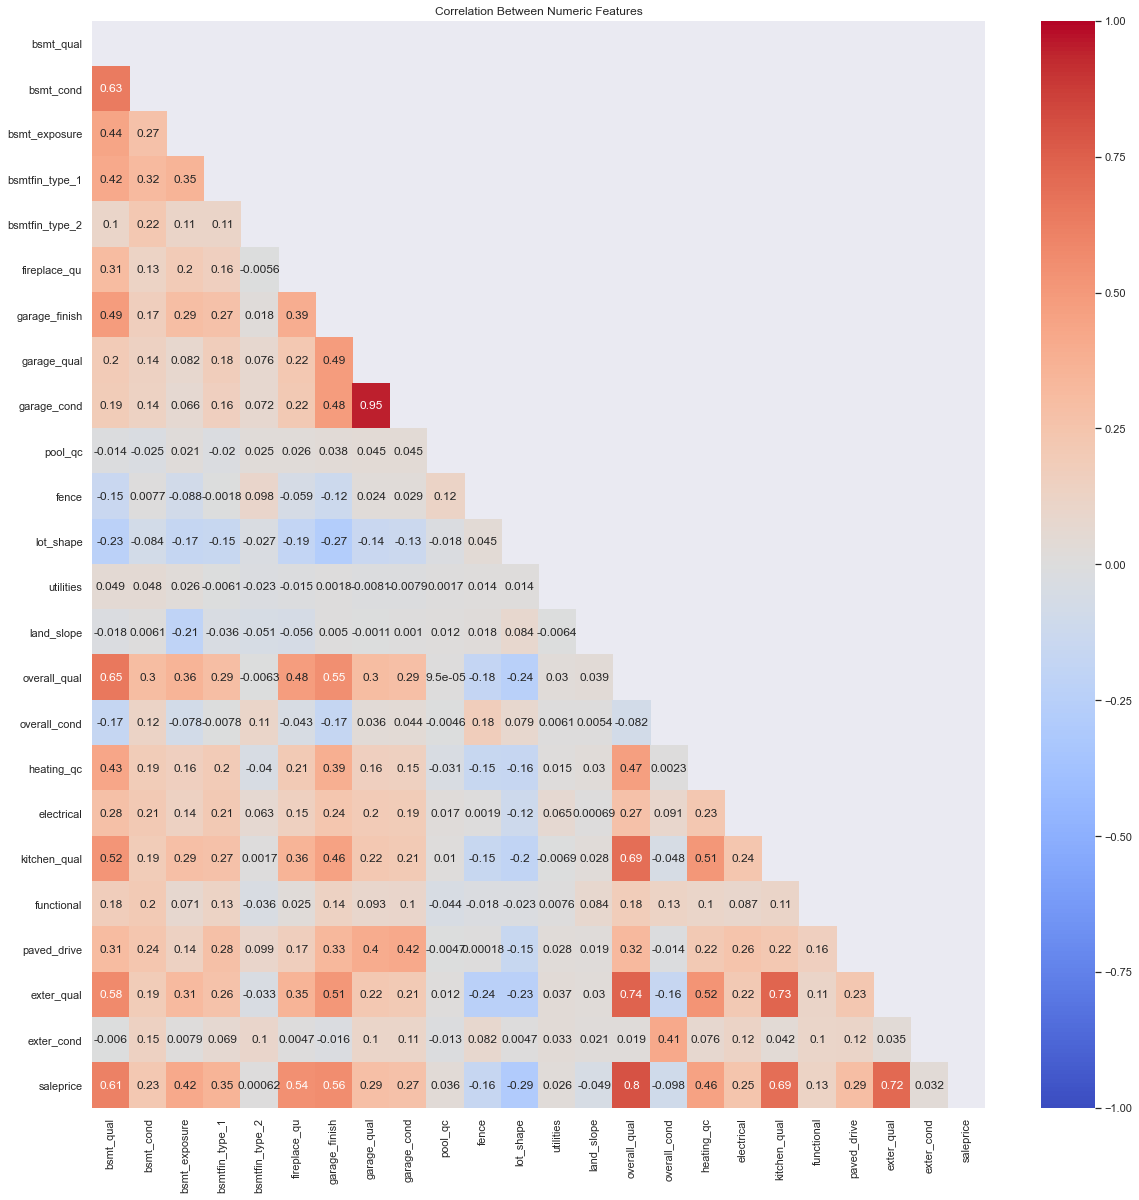

In [72]:
# Create a heatmap to visualize the correlation between all ordinal features

# Add saleprice to ord_var to show the correlation between ordinal variables and saleprice which is 
#a continuous variable

ord_var_corr = ord_var + ['saleprice']

corr_ord = df_train[ord_var_corr].corr()
plt.figure(figsize=(20,20))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr_ord)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
sns.heatmap(corr_ord, mask=mask, annot=True, vmin=-1, vmax=1, center= 0, cmap='coolwarm')
plt.title('Correlation Between Numeric Features');

**Key Observation**

1. `overall_qual`, `exter_qual`, `kitchen_qual` and `bsmt_qual` exhibit the greatest positive correlation with the target variable `saleprice`. These features should be chosen as possible candidates for training the model.

2. `lot_shape` is the most negatively correlated feature with `saleprice`.

3. We will drop columns with little correlation with the `saleprice` based on the following criteria:
  * Positive correlation less than 0.3
  * Negative correlation more than -0.15

In [73]:
ord_var_drop = corr_ord.loc[(corr_ord['saleprice']<0.3)&(corr_ord['saleprice']> -0.15), ['saleprice']]

ord_var_drop

,saleprice
bsmt_cond,0.226542
bsmtfin_type_2,0.000619
garage_qual,0.286347
garage_cond,0.265928
pool_qc,0.036328
utilities,0.026466
land_slope,-0.049279
overall_cond,-0.097791
electrical,0.248432
functional,0.125356


In [74]:
# Drop the ordinal variables from train and test set
df_train.drop(columns=ord_var_drop.index, inplace=True)
df_test.drop(columns=ord_var_drop.index, inplace=True)

In [75]:
# Remove the dropped variables from ord_var

for var in ord_var_drop.index:
    ord_var.remove(var) 

In [76]:
ord_var

['bsmt_qual',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'fireplace_qu',
 'garage_finish',
 'fence',
 'lot_shape',
 'overall_qual',
 'heating_qc',
 'kitchen_qual',
 'exter_qual']

Combine all ordinal and continuous variables and review their correlation for multicollinearity

In [77]:
ord_cont_var = ord_var + cont_var

ord_cont_df = [var for var in ord_cont_var if var in df_train.columns]

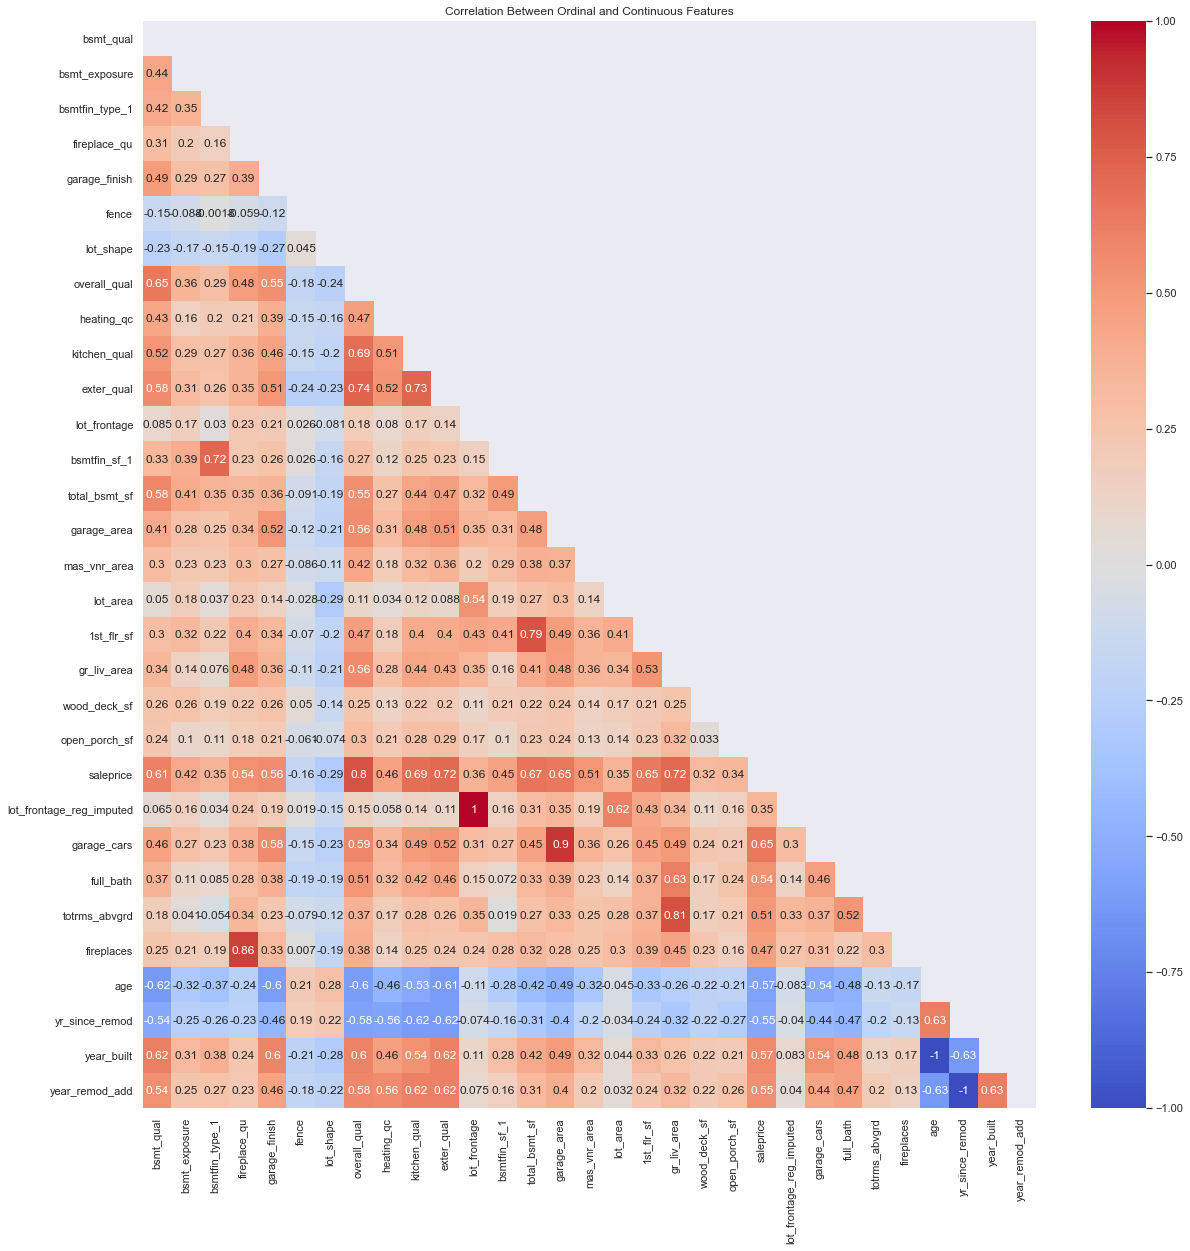

In [78]:
# Create a heatmap to visualize the correlation between all remaining ordinal and continuous features

corr_ord_cont = df_train[ord_cont_df].corr()
plt.figure(figsize=(20,20))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr_ord_cont)
mask[np.triu_indices_from(mask)] = True

# plot the heatmap
sns.heatmap(corr_ord_cont, mask=mask, annot=True, vmin=-1, vmax=1, center= 0, cmap='coolwarm')
plt.title('Correlation Between Ordinal and Continuous Features');

Create a absolute correlation value matrix and drop one of a pair of features with correlation greater than 0.9

In [79]:
#create positive correlation matrix
corr_df = df_train[ord_cont_df].corr().abs()
#create and apply mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)
tri_df.drop(columns=['saleprice'], inplace=True)

In [80]:
tri_df

,bsmt_qual,bsmt_exposure,bsmtfin_type_1,fireplace_qu,garage_finish,fence,lot_shape,overall_qual,heating_qc,kitchen_qual,exter_qual,lot_frontage,bsmtfin_sf_1,total_bsmt_sf,garage_area,mas_vnr_area,lot_area,1st_flr_sf,gr_liv_area,wood_deck_sf,open_porch_sf,lot_frontage_reg_imputed,garage_cars,full_bath,totrms_abvgrd,fireplaces,age,yr_since_remod,year_built,year_remod_add
bsmt_qual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bsmt_exposure,0.439213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bsmtfin_type_1,0.419524,0.354422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fireplace_qu,0.311788,0.195904,0.157829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
garage_finish,0.486674,0.292964,0.267229,0.394900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fence,0.146319,0.087986,0.001767,0.059134,0.118375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lot_shape,0.228067,0.168774,0.150149,0.185808,0.273564,0.044619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall_qual,0.652355,0.355125,0.290426,0.479249,0.554242,0.177053,0.243553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heating_qc,0.434057,0.160916,0.195676,0.209864,0.389311,0.150792,0.160588,0.474326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kitchen_qual,0.523162,0.289022,0.269006,0.358797,0.459795,0.151704,0.195066,0.687791,0.512236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# Find columns that meet threshold

to_drop = [col for col in tri_df.columns if (any(tri_df[col] > 0.9))]

to_drop

['lot_frontage', 'age', 'yr_since_remod']

In [82]:
#Drop the columns

df_train.drop(columns=to_drop, inplace=True)
df_test.drop(columns=to_drop, inplace=True)

In [83]:
# Remove features from ord_var and cont_var

for var in to_drop:
    if var in cont_var:
        cont_var.remove(var)
    elif var in ord_var:
        ord_var.remove(var)

In [84]:
#Check the shape of df_train and df_test
df_train.shape

(2040, 51)

In [85]:
df_test.shape

(879, 50)

#### Reduce Cardinality of Nominal Features

We will inspect the cardinality of the nominal features. This would help to reduce the number of features for the training of model in the next section, as well as to understand the features for the objective of this project, which is to identify the key fearures which influence sales price.

In [86]:
# Inspect the cardinality of the nominal features 
nom_var = [var for var in nom_var if var in df_train.columns]

{var:df_train[var].unique() for var in nom_var}

{'id': array([109, 544, 153, ..., 916, 639,  10], dtype=int64),
 'pid': array([533352170, 531379050, 535304180, ..., 909253010, 535179160,
        527162130], dtype=int64),
 'alley': array(['NA', 'Pave', 'Grvl'], dtype=object),
 'mas_vnr_type': array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object),
 'garage_type': array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', 'NA', '2Types',
        'CarPort'], dtype=object),
 'misc_feature': array(['NA', 'Shed', 'TenC', 'Gar2', 'Othr'], dtype=object),
 'ms_subclass': array([ 60,  20,  50, 180, 160,  70, 120, 190,  85,  30,  90,  80,  75,
         45,  40, 150], dtype=int64),
 'ms_zoning': array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
       dtype=object),
 'street': array(['Pave', 'Grvl'], dtype=object),
 'land_contour': array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object),
 'lot_config': array(['CulDSac', 'Inside', 'Corner', 'FR2', 'FR3'], dtype=object),
 'neighborhood': array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards

In [87]:
df_train['ms_subclass'] = df_train['ms_subclass'].astype(str)
nom_var.remove('id')
nom_var.remove('pid')

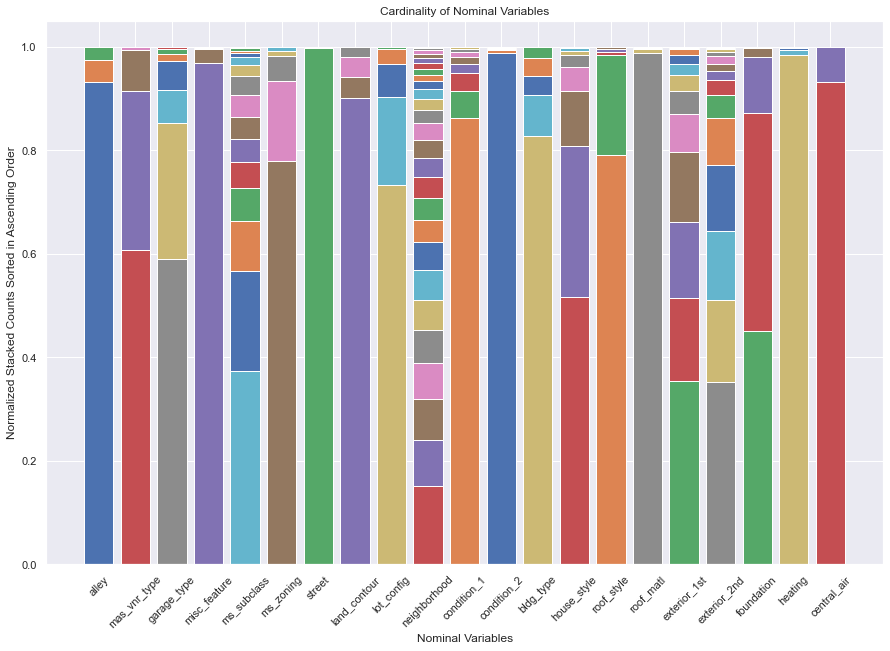

In [88]:
#Visualize the cardinality of variables
sns.set()
plt.figure(figsize=(15,10))

for var in nom_var:
    #Normalized value count in descending order
    nom_cardinality = df_train[var].value_counts(normalize=True, ascending=False, dropna=False)
    
    #Normalized cumulative sum of value count in descending order to facility the stacking of bar plot
    nom_car_cumsum = df_train[var].value_counts(normalize=True, ascending=False, dropna=False).cumsum()
    
    plt.bar(var, nom_cardinality[0])
    for i in range(1,len(nom_cardinality)):
        plt.bar(var, nom_cardinality[i], bottom=nom_car_cumsum[i-1]) #stack the bar plot
        
plt.title('Cardinality of Nominal Variables')
plt.xlabel('Nominal Variables')
plt.ylabel('Normalized Stacked Counts Sorted in Ascending Order')
plt.xticks(rotation=45);

Visualizing the cardinality of the nominal variables, we see that `neighborhood` has the most number of categories which can result in too many features when we one hot encode the variable. We will need to combine groups in `neighborhood` and reduce the cardinality of other variables by grouping the categories with fewer counts together

Let's look at the mean `saleprice` by `neighborhood`

In [89]:
neigh_saleprice = df_train.groupby('neighborhood')['saleprice'].agg(['mean', 
                                                                     'count']
                                                                   ).sort_values(by='mean')

neigh_saleprice.reset_index(inplace=True)

neigh_saleprice

,neighborhood,mean,count
0,MeadowV,100231.250000,24
1,IDOTRR,101103.188406,69
2,BrDale,103371.052632,19
3,OldTown,125276.300613,163
4,BrkSide,127022.697368,76
5,Edwards,129905.787234,141
6,SWISU,134758.875000,32
7,Landmrk,137000.000000,1
8,Sawyer,137181.909910,111
9,NPkVill,140476.470588,17


In [90]:
#Create a cumulative count column for grouping purposes
neigh_saleprice['cumcount'] = neigh_saleprice['count'].cumsum()
neigh_saleprice

,neighborhood,mean,count,cumcount
0,MeadowV,100231.250000,24,24
1,IDOTRR,101103.188406,69,93
2,BrDale,103371.052632,19,112
3,OldTown,125276.300613,163,275
4,BrkSide,127022.697368,76,351
5,Edwards,129905.787234,141,492
6,SWISU,134758.875000,32,524
7,Landmrk,137000.000000,1,525
8,Sawyer,137181.909910,111,636
9,NPkVill,140476.470588,17,653


Divide the neighborhoods into 5 groups of approximately 400 properties. We are converting `neighborhood` into an ordinal variable

In [91]:
def categorize_neigh(row):
    '''This function takes in a dataframe row and create a new column with values 
    based on the cumulative count '''
    if row['cumcount']<=400:
        row['neigh_group']= 'E'
    elif (row['cumcount']<=800)&(row['cumcount']>400):
        row['neigh_group']= 'D'
    elif (row['cumcount']<=1200)&(row['cumcount']>800):
        row['neigh_group']= 'C'
    elif (row['cumcount']<=1600)&(row['cumcount']>1200):
        row['neigh_group']= 'B'
    else:
        row['neigh_group']= 'A'
    return row

In [92]:
neigh_saleprice = neigh_saleprice.apply(categorize_neigh, axis=1)

neigh_saleprice

,neighborhood,mean,count,cumcount,neigh_group
0,MeadowV,100231.250000,24,24,E
1,IDOTRR,101103.188406,69,93,E
2,BrDale,103371.052632,19,112,E
3,OldTown,125276.300613,163,275,E
4,BrkSide,127022.697368,76,351,E
5,Edwards,129905.787234,141,492,D
6,SWISU,134758.875000,32,524,D
7,Landmrk,137000.000000,1,525,D
8,Sawyer,137181.909910,111,636,D
9,NPkVill,140476.470588,17,653,D


In [93]:
#Create list of neighborhoods for each category

neigh_e = [neigh_saleprice.loc[i,'neighborhood'] for i in neigh_saleprice.index if neigh_saleprice.loc[i, 'neigh_group'] =='E']

neigh_d = [neigh_saleprice.loc[i,'neighborhood'] for i in neigh_saleprice.index if neigh_saleprice.loc[i, 'neigh_group'] =='D']

neigh_c = [neigh_saleprice.loc[i,'neighborhood'] for i in neigh_saleprice.index if neigh_saleprice.loc[i, 'neigh_group'] =='C']

neigh_b = [neigh_saleprice.loc[i,'neighborhood'] for i in neigh_saleprice.index if neigh_saleprice.loc[i, 'neigh_group'] =='B']

neigh_a = [neigh_saleprice.loc[i,'neighborhood'] for i in neigh_saleprice.index if neigh_saleprice.loc[i, 'neigh_group'] =='A']

In [94]:
#Since the neighborhood category is now an ordinal variable, we will label category E to A
# using 0 to 4
def categorize_neighbor(row):
    '''This function takes in a dataframe row and create a new column with values 0 to 4 
    based on memeber ship in the neighbourhood list '''
    if row['neighborhood'] in neigh_e:
        row['neigh_group']= 0
    elif row['neighborhood'] in neigh_d:
        row['neigh_group']= 1
    elif row['neighborhood'] in neigh_c:
        row['neigh_group']= 2
    elif row['neighborhood'] in neigh_b:
        row['neigh_group']= 3
    elif row['neighborhood'] in neigh_a:
        row['neigh_group']= 4
    return row

In [95]:
# Create new column 'neigh_group' on both train and test sets
df_train = df_train.apply(categorize_neighbor, axis=1)
df_test = df_test.apply(categorize_neighbor, axis=1)

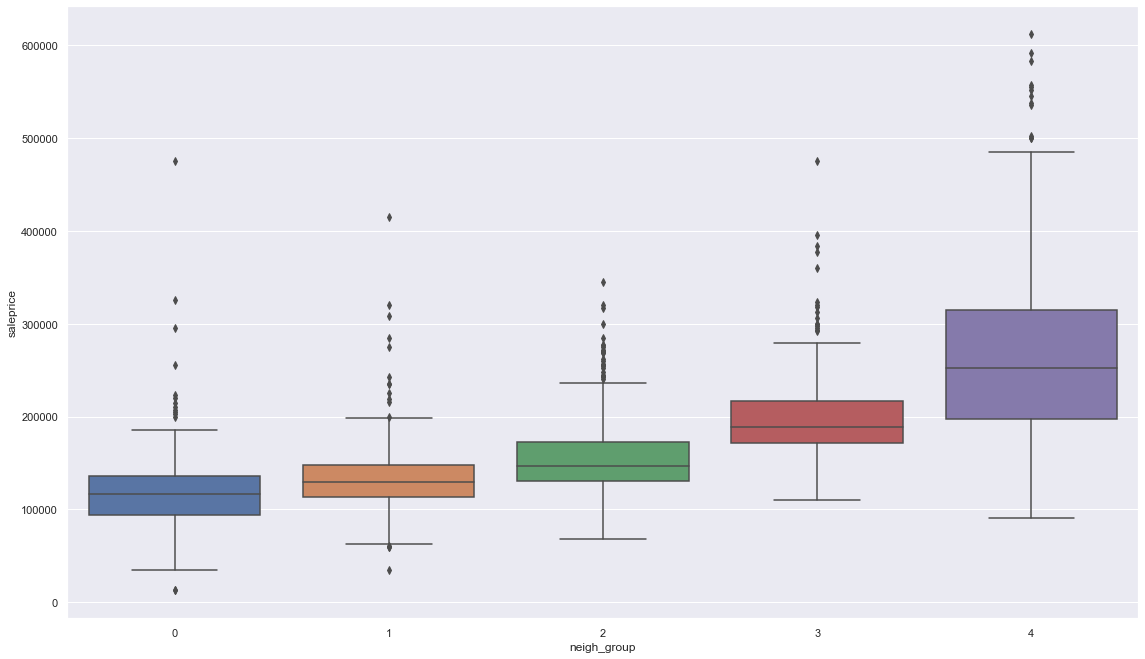

In [96]:
plot_boxplot(df_train, ['neigh_group'], 70, 10, y_var='saleprice')

The boxplot of the new category of `neigh_group` show mean and median `saleprice` increase through category 0 to 4

''

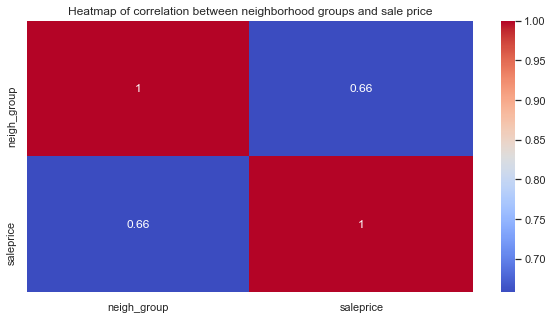

In [97]:
sns.set()
plt.figure(figsize=(10,5))

sns.heatmap(
    df_train[['neigh_group', 'saleprice']].corr(),
    annot=True,
    cmap='coolwarm'
)

plt.title('Heatmap of correlation between neighborhood groups and sale price')
;

A good correlation of 0.66 between `neigh_group` and `saleprice`

1. We will now remove `neighborhood` from both `df_train` and `df_test`.

2. `neighborhood` will be removed from `nom_var` and `neigh_group` added to `ord_var

In [98]:
df_train.drop(columns=['neighborhood'], inplace=True)
df_test.drop(columns=['neighborhood'], inplace=True)

In [99]:
nom_var.remove('neighborhood')
ord_var.append('neigh_group')

We will now use the custom reduce_cardinality function to reduce cardinality of nominal functions by grouping smaller sized categories together under 'Others'

In [100]:
df_train, df_test = reduce_cardinality(df_train, df_test, nom_var, threshold=0.80)

In [101]:
# Inspect the updated cardinality in nomibal variables
nom_var = [var for var in nom_var if var in df_train.columns]

{var:df_train[var].unique() for var in nom_var}

{'mas_vnr_type': array(['Others', 'None'], dtype=object),
 'garage_type': array(['Attchd', 'Others'], dtype=object),
 'ms_subclass': array(['60', '20', '50', 'Others', '120', '30'], dtype=object),
 'ms_zoning': array(['RL', 'Others'], dtype=object),
 'lot_config': array(['Others', 'Inside'], dtype=object),
 'house_style': array(['Others', '1Story'], dtype=object),
 'roof_style': array(['Gable', 'Others'], dtype=object),
 'exterior_1st': array(['HdBoard', 'VinylSd', 'Wd Sdng', 'Others', 'MetalSd'], dtype=object),
 'exterior_2nd': array(['Others', 'VinylSd', 'Wd Sdng', 'HdBoard', 'MetalSd'], dtype=object),
 'foundation': array(['Others', 'PConc'], dtype=object)}

In [102]:
#Check the shape of df_train and df_test
df_train.shape

(2040, 41)

In [103]:
df_test.shape

(879, 40)

#### One Hot Encode nominal variables

In [104]:
# Update the nominal variables remaining in the df_train

nom_var = [var for var in nom_var if var in df_train.columns]

nom_var

['mas_vnr_type',
 'garage_type',
 'ms_subclass',
 'ms_zoning',
 'lot_config',
 'house_style',
 'roof_style',
 'exterior_1st',
 'exterior_2nd',
 'foundation']

In [105]:
df_train= df_train.reset_index(drop=True)
df_test= df_test.reset_index(drop=True)

In [106]:
df_train

,id,pid,ms_subclass,ms_zoning,lot_area,lot_shape,lot_config,house_style,overall_qual,year_built,year_remod_add,roof_style,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,foundation,bsmt_qual,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,full_bath,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,wood_deck_sf,open_porch_sf,fence,saleprice,lot_frontage_reg_imputed,neigh_group
0,109,533352170,60,RL,13517,2.0,Others,Others,5.0,1976,2005,Gable,HdBoard,Others,Others,289.0,3.0,Others,3.0,1.0,6.0,533.0,725.0,4.0,725,1479,2,3.0,6,0,0.0,Attchd,2.0,2.0,475.0,0,44,0.0,130500,85.177394,1
1,544,531379050,60,RL,11492,2.0,Others,Others,6.0,1996,1997,Gable,VinylSd,VinylSd,Others,132.0,3.0,PConc,4.0,1.0,6.0,637.0,913.0,4.0,913,2122,2,3.0,8,1,3.0,Attchd,2.0,2.0,559.0,0,74,0.0,220000,43.000000,2
2,153,535304180,20,RL,7922,3.0,Inside,1Story,4.0,1953,2007,Gable,VinylSd,VinylSd,None,0.0,2.0,Others,3.0,1.0,6.0,731.0,1057.0,2.0,1057,1057,1,3.0,5,0,0.0,Others,1.0,1.0,246.0,0,52,0.0,109000,68.000000,2
3,318,916386060,60,RL,9802,3.0,Inside,Others,4.0,2006,2007,Gable,VinylSd,VinylSd,None,0.0,2.0,PConc,4.0,1.0,1.0,0.0,384.0,3.0,744,1444,2,2.0,7,0,0.0,Others,3.0,2.0,400.0,100,0,0.0,174000,73.000000,4
4,255,906425045,50,RL,14235,2.0,Inside,Others,5.0,1900,1993,Gable,Wd Sdng,Others,None,0.0,2.0,PConc,2.0,1.0,1.0,0.0,676.0,2.0,831,1445,2,2.0,6,0,0.0,Others,1.0,2.0,484.0,0,59,0.0,138500,82.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,1587,921126030,20,RL,11449,2.0,Inside,1Story,7.0,2007,2007,Gable,VinylSd,VinylSd,None,0.0,3.0,PConc,4.0,3.0,6.0,1011.0,1884.0,4.0,1728,1728,2,3.0,7,1,4.0,Attchd,3.0,2.0,520.0,0,276,0.0,298751,79.000000,4
2036,785,905377130,30,RL,12342,2.0,Inside,1Story,3.0,1940,1950,Gable,VinylSd,VinylSd,None,0.0,2.0,Others,3.0,1.0,4.0,262.0,861.0,4.0,861,861,1,2.0,4,0,0.0,Others,1.0,2.0,539.0,158,0,0.0,82500,81.656690,1
2037,916,909253010,50,RL,7558,3.0,Inside,Others,5.0,1928,1950,Gable,Others,Others,None,0.0,2.0,Others,3.0,1.0,1.0,0.0,896.0,3.0,1172,1913,1,2.0,9,1,3.0,Others,1.0,2.0,342.0,0,0,0.0,177000,57.000000,4
2038,639,535179160,20,RL,10400,3.0,Others,1Story,3.0,1956,1956,Gable,Others,Others,None,0.0,2.0,Others,3.0,1.0,3.0,155.0,1200.0,2.0,1200,1200,1,2.0,6,2,4.0,Attchd,1.0,1.0,294.0,0,189,0.0,144000,80.000000,2


In [107]:
# Ensure all nominal variables are strings
for var in nom_var:
    df_train[var] =  df_train[var].astype('str')
    df_test[var] =  df_test[var].astype('str')

In [108]:
df_train = onehotenc(df_train, nom_var)

In [109]:
df_test = onehotenc(df_test, nom_var)

In [110]:
#Check the shape of df_train and df_test
df_train.shape

(2040, 61)

In [111]:
df_test.shape

(879, 73)

In [112]:
# Check for features in df_train that is not in df_test
missing_col_test = [col for col in df_train.columns if col not in df_test.columns]

The only missing variable in test compared to train is `saleprice`, which is expected and `ms_subclass_Others`

In [113]:
missing_col_test

['saleprice', 'ms_subclass_Others']

The missing variable `ms_subclass_Others` in `df_train` that is not in `df_test` is due to categories in nominal variables that exist on the train set but not the test set. We will create the column on `df_test` and fill them up with zeros to ensure both `df_test` and `df_train` have the same number of columns

In [114]:
if 'saleprice' in missing_col_test:
    missing_col_test.remove('saleprice')
    
    
for col in missing_col_test:
    df_test[col]=0

In [115]:
# Check for features in df_test that is not in df_train
missing_col_train = [col for col in df_test.columns if col not in df_train.columns]

In [116]:
missing_col_train

['mas_vnr_type_CBlock',
 'ms_subclass_160',
 'ms_subclass_180',
 'ms_subclass_190',
 'ms_subclass_40',
 'ms_subclass_45',
 'ms_subclass_70',
 'ms_subclass_75',
 'ms_subclass_80',
 'ms_subclass_85',
 'ms_subclass_90',
 'exterior_1st_PreCast',
 'exterior_2nd_Other',
 'exterior_2nd_PreCast']

The missing variables in `df_test` that is not in `df_train` is due to categories in nominal variables that exist on the test set but not the train set. We will create these columns on `df_train` and fill them up with zeros to ensure both `df_test` and `df_train` have the same number of columns

In [117]:
for col in missing_col_train:
    df_train[col]=0

Check the shape of df_train and df_test. They should differ by 1 due to the `saleprice` target variable

In [118]:
df_train.shape

(2040, 75)

In [119]:
df_test.shape

(879, 74)

In [120]:
df_train.head()

,id,pid,lot_area,lot_shape,overall_qual,year_built,year_remod_add,mas_vnr_area,exter_qual,bsmt_qual,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,total_bsmt_sf,heating_qc,1st_flr_sf,gr_liv_area,full_bath,kitchen_qual,totrms_abvgrd,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,wood_deck_sf,open_porch_sf,fence,saleprice,lot_frontage_reg_imputed,neigh_group,mas_vnr_type_None,mas_vnr_type_Others,garage_type_Attchd,garage_type_Others,ms_subclass_120,ms_subclass_20,ms_subclass_30,ms_subclass_50,ms_subclass_60,ms_subclass_Others,ms_zoning_Others,ms_zoning_RL,lot_config_Inside,lot_config_Others,house_style_1Story,house_style_Others,roof_style_Gable,roof_style_Others,exterior_1st_HdBoard,exterior_1st_MetalSd,exterior_1st_Others,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_2nd_HdBoard,exterior_2nd_MetalSd,exterior_2nd_Others,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,foundation_Others,foundation_PConc,mas_vnr_type_CBlock,ms_subclass_160,ms_subclass_180,ms_subclass_190,ms_subclass_40,ms_subclass_45,ms_subclass_70,ms_subclass_75,ms_subclass_80,ms_subclass_85,ms_subclass_90,exterior_1st_PreCast,exterior_2nd_Other,exterior_2nd_PreCast
0,109,533352170,13517,2.0,5.0,1976,2005,289.0,3.0,3.0,1.0,6.0,533.0,725.0,4.0,725,1479,2,3.0,6,0,0.0,2.0,2.0,475.0,0,44,0.0,130500,85.177394,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,544,531379050,11492,2.0,6.0,1996,1997,132.0,3.0,4.0,1.0,6.0,637.0,913.0,4.0,913,2122,2,3.0,8,1,3.0,2.0,2.0,559.0,0,74,0.0,220000,43.000000,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,153,535304180,7922,3.0,4.0,1953,2007,0.0,2.0,3.0,1.0,6.0,731.0,1057.0,2.0,1057,1057,1,3.0,5,0,0.0,1.0,1.0,246.0,0,52,0.0,109000,68.000000,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,318,916386060,9802,3.0,4.0,2006,2007,0.0,2.0,4.0,1.0,1.0,0.0,384.0,3.0,744,1444,2,2.0,7,0,0.0,3.0,2.0,400.0,100,0,0.0,174000,73.000000,4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,255,906425045,14235,2.0,5.0,1900,1993,0.0,2.0,2.0,1.0,1.0,0.0,676.0,2.0,831,1445,2,2.0,6,0,0.0,1.0,2.0,484.0,0,59,0.0,138500,82.000000,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [121]:
df_train = df_train.reindex(sorted(df_train.columns), axis=1)

In [122]:
df_test = df_test.reindex(sorted(df_test.columns), axis=1)

Both the test and train data is saved and processed in the next Notebook: Modeling and Conclusion

In [123]:
df_train.to_csv('../data/train_processed.csv', index=False)
df_test.to_csv('../data/test_processed.csv', index=False)